<a href="https://colab.research.google.com/github/Frinhani/LearningMachineLearning/blob/main/NLP_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
%matplotlib inline
!pip install wordcloud
from wordcloud import WordCloud
!pip install nltk
import nltk
nltk.download('all')
from nltk import tokenize
import seaborn as sns
from string import punctuation
!pip install unidecode
import unidecode
from nltk import ngrams

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [2]:
resenha = pd.read_csv('/content/drive/MyDrive/Files/imdb-reviews-pt-br.csv')

classificacao = resenha['sentiment'].replace(['neg', 'pos'], [0,1])

resenha['classificacao'] = classificacao

In [3]:
def classificar_texto(texto, coluna_texto, coluna_classifiacao):
  vetorizar = CountVectorizer(lowercase=False, max_features=50)
  bag_of_words = vetorizar.fit_transform(texto[coluna_texto])
  treino, teste, classe_treino, classe_teste = train_test_split(bag_of_words, 
                                                               texto[coluna_classifiacao], 
                                                                random_state = 42)


  regressao_logistica = LogisticRegression()
  regressao_logistica.fit(treino, classe_treino)
  return regressao_logistica.score(teste, classe_teste)

print(classificar_texto(resenha, 'text_pt', 'classificacao'))

0.6583097452486858


In [4]:
# matriz_esparsa = pd.DataFrame.sparse.from_spmatrix(bag_of_words, columns=vetorizar.get_feature_names())
# matriz_esparsa

In [5]:
# todas_palavras = [texto for texto in resenha['text_pt']]
# len(todas_palavras)

In [6]:
todas_palavras = ' '.join([texto for texto in resenha['text_pt']])

In [7]:
len(todas_palavras)

63448424

In [8]:
# todas_palavras = ' '.join([texto for texto in resenha['text_pt']])
# nuvem_palavras = WordCloud(width=800, height=500, 
#                            max_font_size=110, collocations=False).generate(todas_palavras)
# plt.figure(figsize=(15,8))
# plt.imshow(nuvem_palavras, interpolation='bilinear')
# plt.axis('off')
# plt.show()

In [9]:
def nuvem_palavras_neg(texto, coluna_texto):

  texto_negativo =  resenha.query("sentiment == 'neg'")
  todas_palavras = ' '.join([texto for texto in texto_negativo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, 
                            max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(15,8))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

In [10]:
def nuvem_palavras_pos(texto, coluna_texto):

  texto_positivo =  resenha.query("sentiment == 'pos'")
  todas_palavras = ' '.join([texto for texto in texto_positivo[coluna_texto]])

  nuvem_palavras = WordCloud(width=800, height=500, 
                            max_font_size=110, collocations=False).generate(todas_palavras)

  plt.figure(figsize=(15,8))
  plt.imshow(nuvem_palavras, interpolation='bilinear')
  plt.axis('off')
  plt.show()

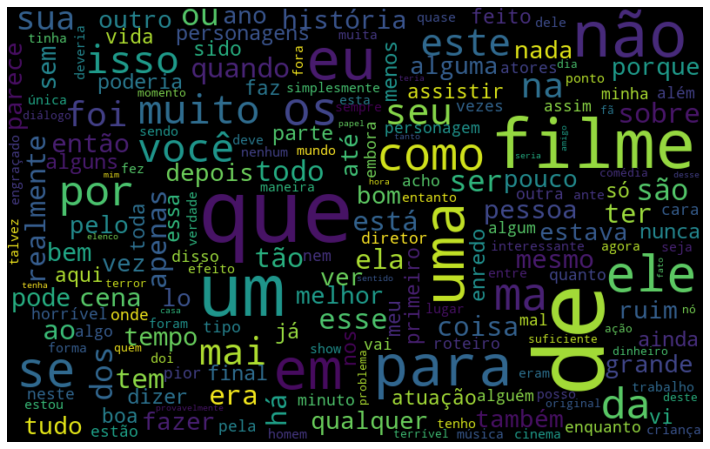

In [11]:
nuvem_palavras_neg(resenha, 'text_pt')

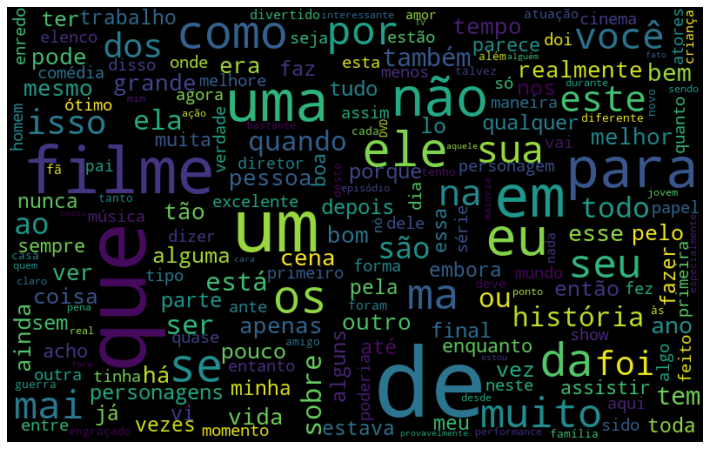

In [12]:
nuvem_palavras_pos(resenha,'text_pt')

In [13]:
token_espaco = tokenize.WhitespaceTokenizer()
token_frase = token_espaco.tokenize(todas_palavras)
frequencia = nltk.FreqDist(token_frase)

In [14]:
df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                              'frequencia':list(frequencia.values())})

In [15]:
def pareto(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([texto for texto in texto[coluna_texto]])
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencia = nltk.FreqDist(token_frase)
  df_frequencia = pd.DataFrame({'Palavra':list(frequencia.keys()),
                                'Frequência':list(frequencia.values())})
  df_frequencia = df_frequencia.nlargest(quantidade, 'Frequência')
  plt.figure(figsize=(12, 8))
  ax = sns.barplot(data=df_frequencia, x='Palavra', y='Frequência', color='gray')
  ax.set(ylabel = 'Contagem')
  plt.show()

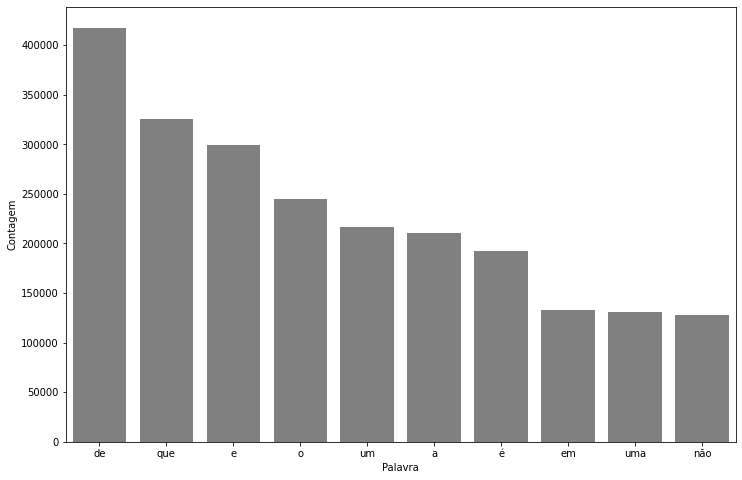

In [16]:
pareto(resenha, 'text_pt', 10)

In [17]:
def pareto2(texto, coluna_texto, quantidade):
  todas_palavras = ' '.join([resenha for resenha in texto[coluna_texto]])
  token_espaco = nltk.tokenize.WhitespaceTokenizer()
  token_frase = token_espaco.tokenize(todas_palavras)
  frequencias = nltk.FreqDist(token_frase)
  df_frequencias = pd.DataFrame({'Palavras': list(frequencias.keys()),
                               'Frequência': list(frequencias.values())})
  df_frequencias = df_frequencias.nlargest(n=quantidade, columns='Frequência')

  total = df_frequencias['Frequência'].sum()
  df_frequencias['Porcentagem'] = df_frequencias['Frequência'].cumsum() / total * 100

  plt.figure(figsize=(12,8))
  ax = sns.barplot(data=df_frequencias, x='Palavras', y='Frequência', color='gray')
  ax2 = ax.twinx()
  sns.lineplot(data=df_frequencias, x='Palavras', y='Porcentagem', color='red', sort=False, ax=ax2)
  plt.show()

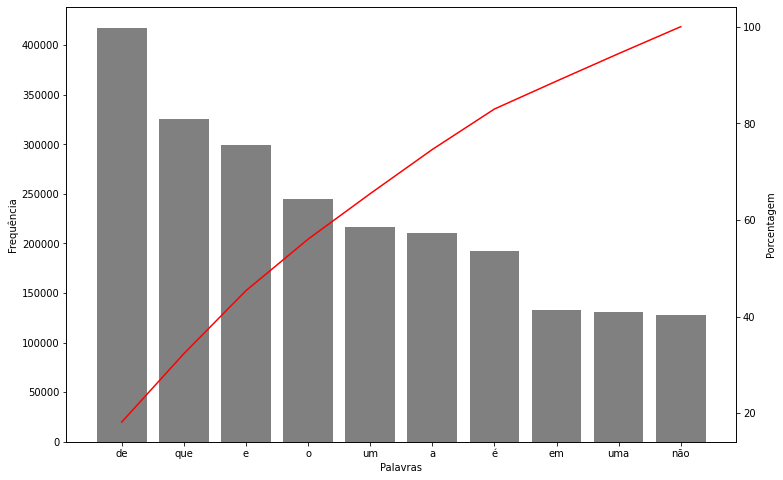

In [18]:
pareto2(resenha, 'text_pt', 10)


In [19]:
palavras_irrelevantes = nltk.corpus.stopwords.words('portuguese')
frase_processada = list()
for opiniao in resenha.text_pt:
  nova_frase = list()
  palavras_texto = token_espaco.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in palavras_irrelevantes:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
resenha['tratamento_1'] = frase_processada

In [20]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece..."
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi..."
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve..."


In [21]:
classificar_texto(resenha, 'tratamento_1','classificacao')

0.6607359482410028

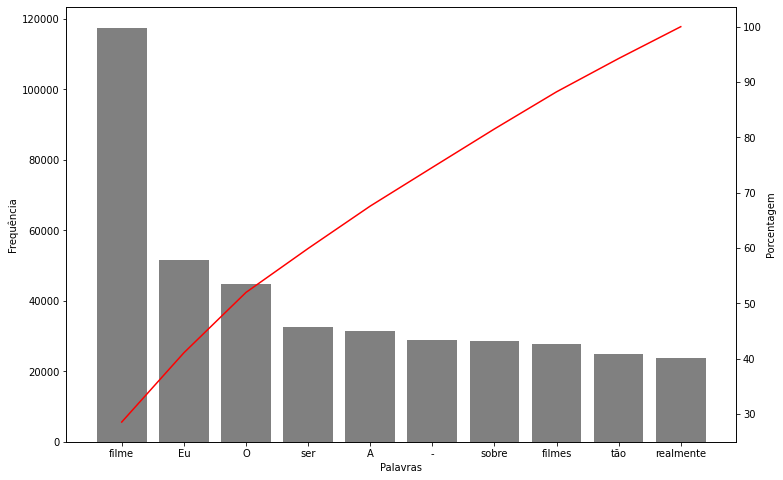

In [22]:
pareto2(resenha, 'tratamento_1', 10)

#Introdução ao Processamento de Linguagem Natural com Python (Parte 2)

##Otimizando a análise: o primeiro passo

In [23]:
frase = "Olá mundo!"
token_pontuacao = tokenize.WordPunctTokenizer()
token_frase = token_pontuacao.tokenize(frase)

print(token_frase)

['Olá', 'mundo', '!']


In [24]:
pontuacao = list()
for ponto in punctuation:
  pontuacao.append(ponto)

In [25]:
pontuacao_stopwords = pontuacao + palavras_irrelevantes

In [26]:
frase_processada = list()
for opiniao in resenha['tratamento_1']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in pontuacao_stopwords:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
resenha['tratamento_2'] = frase_processada

In [27]:
resenha.head()

,id,text_en,text_pt,sentiment,classificacao,tratamento_1,tratamento_2
0,1,Once again Mr. Costner has dragged out a movie...,"Mais uma vez, o Sr. Costner arrumou um filme p...",neg,0,"Mais vez, Sr. Costner arrumou filme tempo nece...",Mais vez Sr Costner arrumou filme tempo necess...
1,2,This is an example of why the majority of acti...,Este é um exemplo do motivo pelo qual a maiori...,neg,0,Este exemplo motivo maioria filmes ação mesmos...,Este exemplo motivo maioria filmes ação mesmos...
2,3,"First of all I hate those moronic rappers, who...","Primeiro de tudo eu odeio esses raps imbecis, ...",neg,0,"Primeiro tudo odeio raps imbecis, poderiam agi...",Primeiro tudo odeio raps imbecis poderiam agir...
3,4,Not even the Beatles could write songs everyon...,Nem mesmo os Beatles puderam escrever músicas ...,neg,0,Nem Beatles puderam escrever músicas todos gos...,Nem Beatles puderam escrever músicas todos gos...
4,5,Brass pictures movies is not a fitting word fo...,Filmes de fotos de latão não é uma palavra apr...,neg,0,"Filmes fotos latão palavra apropriada eles, ve...",Filmes fotos latão palavra apropriada verdade ...


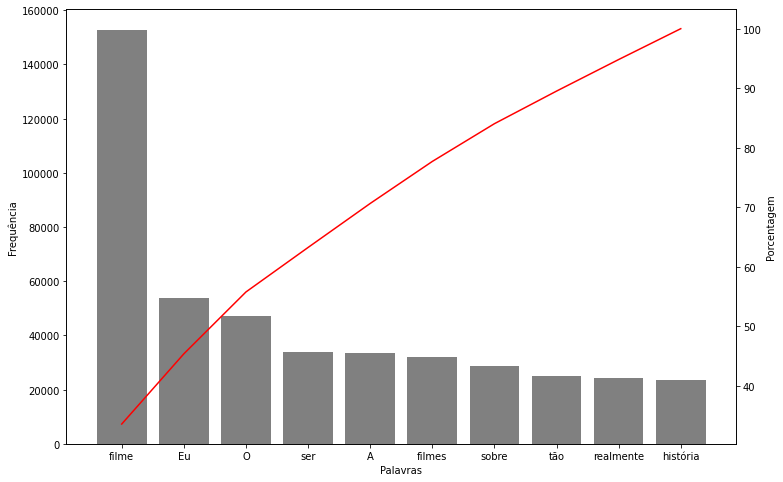

In [28]:
pareto2(resenha, 'tratamento_2', 10)

In [29]:
classificar_texto(resenha, 'tratamento_2', 'classificacao')

0.681196926809543

In [30]:
acentos = 'ótimo péssimo não é tão'

teste = unidecode.unidecode(acentos)

print(teste)

otimo pessimo nao e tao


In [31]:
sem_acentos = [unidecode.unidecode(texto) for texto in resenha.tratamento_2]

In [32]:
stopword_sem_acento = [unidecode.unidecode(texto) for texto in pontuacao_stopwords]

In [33]:
resenha['tratamento_3'] = sem_acentos
frase_processada = list()
for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopword_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
resenha['tratamento_3'] = frase_processada


In [34]:
acuracia_tratamento3 = classificar_texto(resenha,'tratamento_3','classificacao')

print(acuracia_tratamento3)

0.6810351799433886


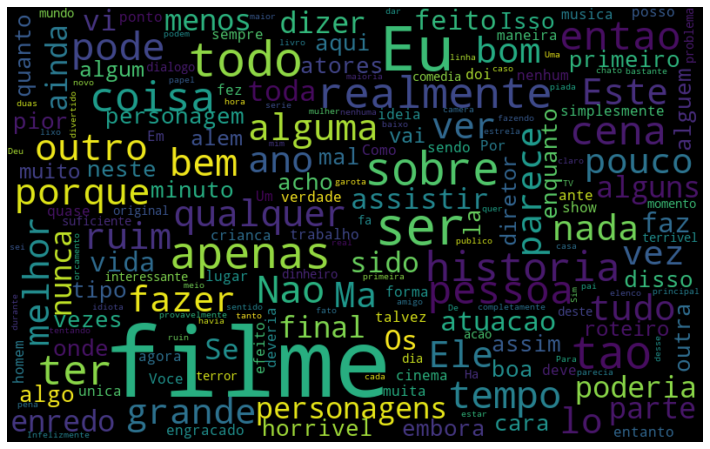

In [35]:
nuvem_palavras_neg(resenha, 'tratamento_3')

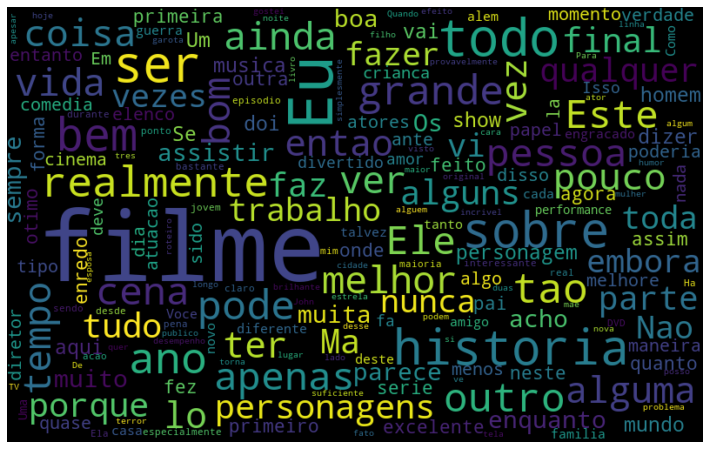

In [36]:
nuvem_palavras_pos(resenha, 'tratamento_3')

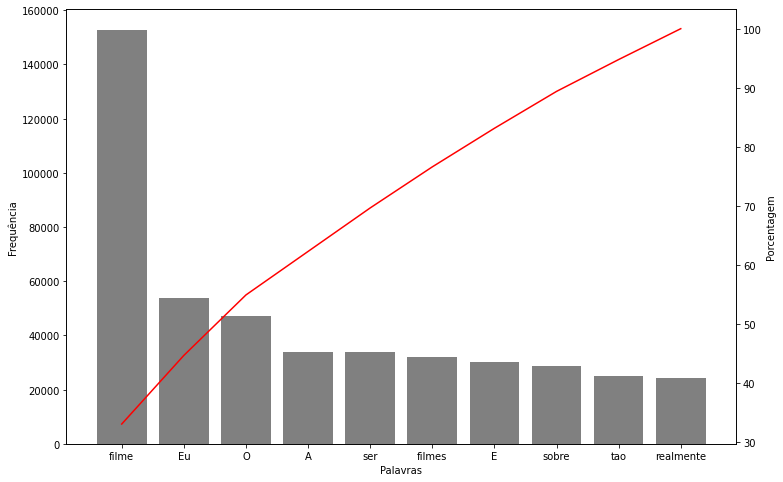

In [37]:
pareto2(resenha, 'tratamento_3', 10)

In [38]:
frase_processada = list()
for opiniao in resenha['tratamento_3']:
  nova_frase = list()
  opiniao = opiniao.lower()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    if palavra not in stopword_sem_acento:
      nova_frase.append(palavra)
  frase_processada.append(' '.join(nova_frase))
resenha['tratamento_4'] = frase_processada

In [39]:
acuracia_tratamento4 = classificar_texto(resenha, 'tratamento_4', 'classificacao')
print(acuracia_tratamento4)

0.6879094217549535


In [40]:
print(acuracia_tratamento3)


0.6810351799433886


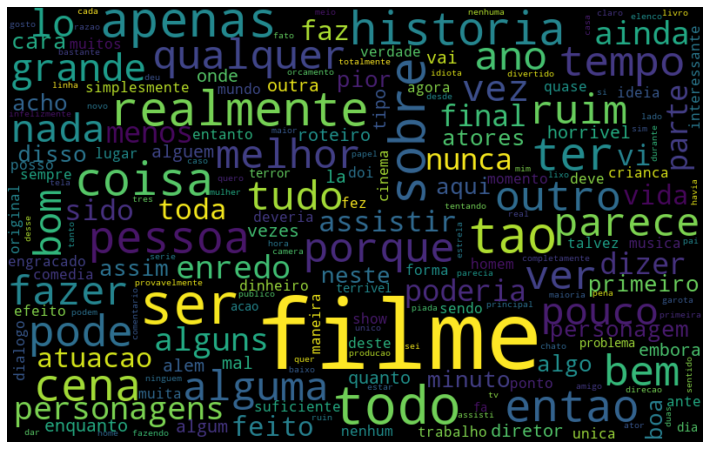

In [41]:
nuvem_palavras_neg(resenha, 'tratamento_4')

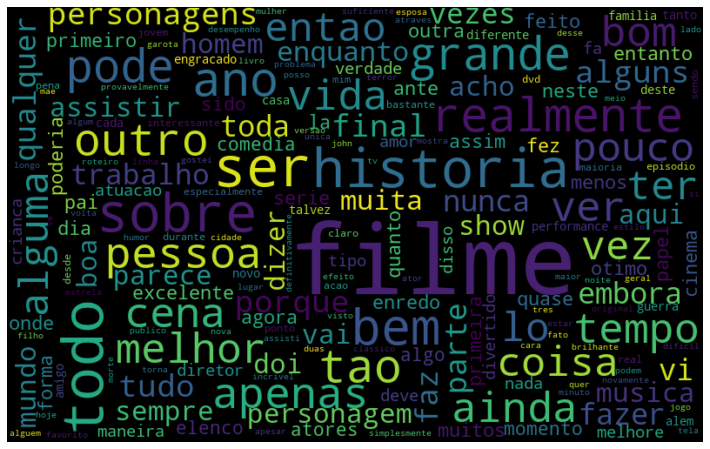

In [42]:
nuvem_palavras_pos(resenha, 'tratamento_4')

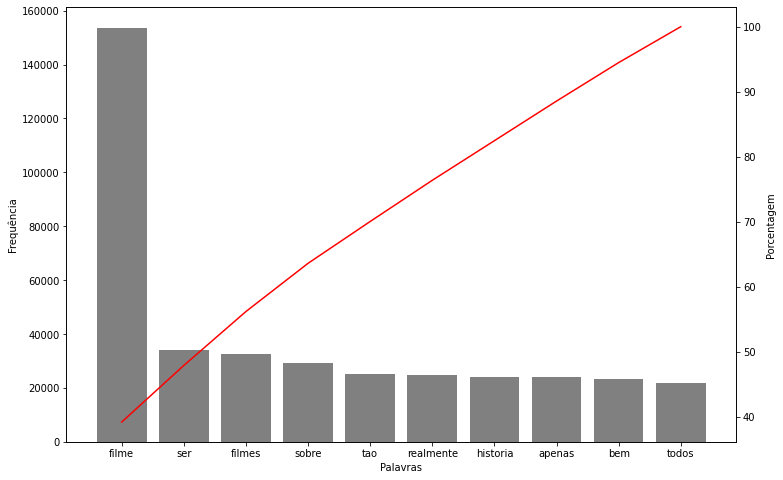

In [43]:
pareto2(resenha, 'tratamento_4', 10)

In [44]:
stemmer = nltk.RSLPStemmer()

stemmer.stem('correria')

'corr'

In [45]:
frase_processada = list()
for opiniao in resenha['tratamento_4']:
  nova_frase = list()
  palavras_texto = token_pontuacao.tokenize(opiniao)
  for palavra in palavras_texto:
    nova_frase.append(stemmer.stem(palavra))
  frase_processada.append(' '.join(nova_frase))
resenha['tratamento_5'] = frase_processada

In [46]:
acuracia_tratamento5 = classificar_texto(resenha, 'tratamento_5', 'classificacao')

print('acuracia Tratamento_4 = ',acuracia_tratamento4)
print('acuracia Tratamento_5 = ',acuracia_tratamento5)

acuracia Tratamento_4 =  0.6879094217549535
acuracia Tratamento_5 =  0.6943792964011323


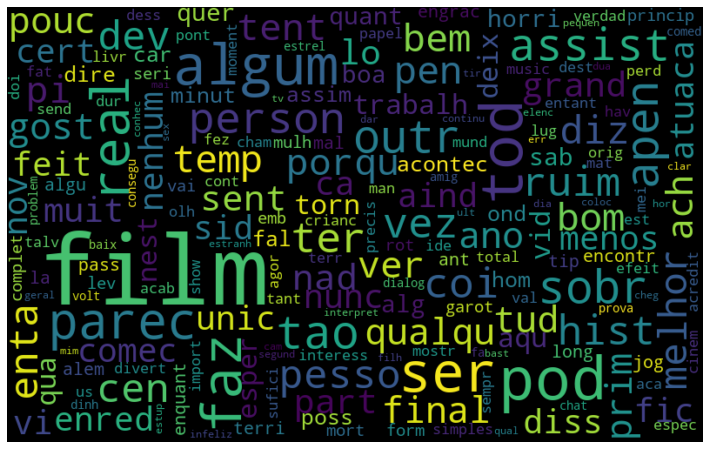

In [47]:
nuvem_palavras_neg(resenha, 'tratamento_5')

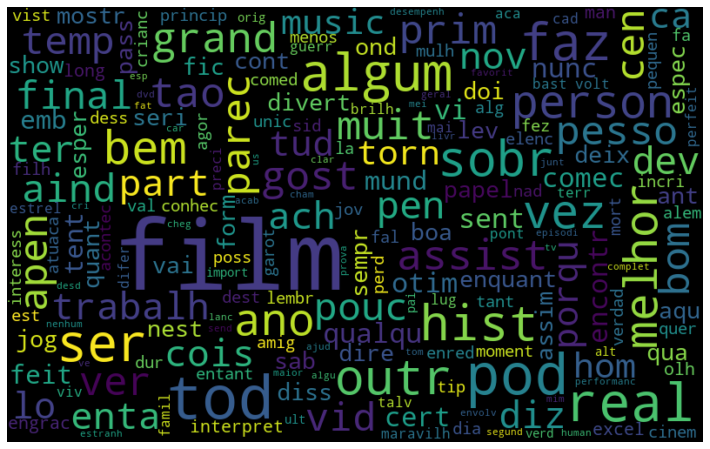

In [48]:
nuvem_palavras_pos(resenha, 'tratamento_5')

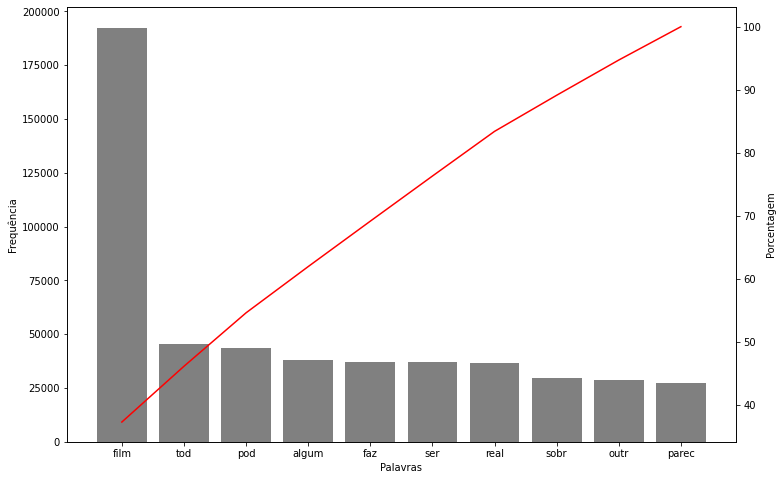

In [49]:
pareto2(resenha, 'tratamento_5', 10)

In [50]:
tfidf = TfidfVectorizer(lowercase= False, max_features=50)

In [51]:
tfidf_bruto = tfidf.fit_transform(resenha['text_pt'])

In [52]:
treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_bruto, resenha['classificacao'], random_state = 42
)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_bruto = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_bruto)

0.6600889607763849


In [53]:
tfidf_tratados = tfidf.fit_transform(resenha['tratamento_5'])

treino, teste, classe_treino, classe_teste = train_test_split(
    tfidf_tratados, resenha['classificacao'], random_state = 42
)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_tratados = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_tratados)

0.6988273352203801


In [54]:
tfidf = TfidfVectorizer(lowercase=False, ngram_range=(1, 2))
vetor_tfidf = tfidf.fit_transform(resenha['tratamento_5'])
treino, teste, classe_treino, classe_teste = train_test_split(
    vetor_tfidf, resenha['classificacao'], random_state = 42)
regressao_logistica = LogisticRegression()
regressao_logistica.fit(treino, classe_treino)
acuracia_tfidf_ngrams = regressao_logistica.score(teste, classe_teste)
print(acuracia_tfidf_ngrams)

0.8858875859280226


In [55]:
pesos = pd.DataFrame(
    regressao_logistica.coef_[0].T,
    index = tfidf.get_feature_names()
)


In [58]:
pesos.nlargest(10, 0)

,0
otim,9.883148
excel,8.998212
perfeit,6.909051
maravilh,6.277557
favorit,5.888959
incri,5.746389
divert,5.411610
brilh,4.856989
ador,4.570598
hoj,4.491365


In [59]:
pesos.nsmallest(10,0)

,0
ruim,-11.761766
pi,-11.424122
horri,-9.701481
terri,-8.386112
nad,-7.610627
chat,-7.508107
parec,-6.628180
nenhum,-6.369930
tent,-5.774706
mal,-5.710310
